# dependencies

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data handling

In [3]:
df = pd.read_csv("/content/water_potability.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


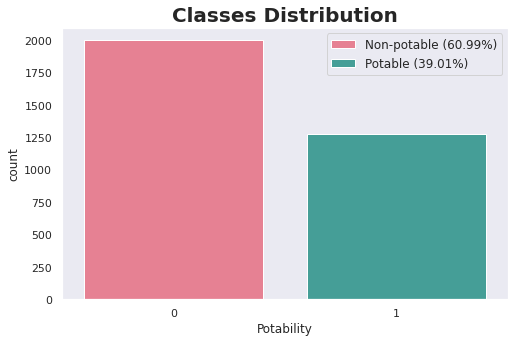

In [5]:
# plot style
sns.set(style="dark")
plt.figure(figsize=(8,5))
plt.title("Classes Distribution", fontweight="bold", fontsize=20)

# create plot
ax = sns.countplot(x="Potability", hue="Potability", dodge=False, palette="husl", data=df)

# plot legend
proportion_0, proportion_1 = df["Potability"].value_counts(normalize=True)
plt.legend(labels = ["Non-potable ({:.2%})".format(proportion_0), "Potable ({:.2%})".format(proportion_1)], fontsize=12)

plt.show()

## data cleaning

In [6]:
# checking missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
# removing missing values
clean_df = df.dropna()

# building model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
# axis
X = clean_df.drop("Potability", axis=1)
y = clean_df["Potability"]

# preprocessing data
st_scaler = StandardScaler()
X = st_scaler.fit_transform(X)

# splitting data into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [10]:
# getting best model based on number optimal number of neighbors in range [1, 10]

k_neighbors = np.arange(1, 11)
optimal_k = None
optimal_model = None
optimal_accuracy = 0

test_accuracy = np.empty(len(k_neighbors))
train_accuracy = np.empty(len(k_neighbors))

for i, k in enumerate(k_neighbors):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)

  # compute testing accuracy to 'k' neighbors
  y_pred_test = model.predict(X_test)
  test_accuracy[i] = accuracy_score(y_test, y_pred_test)

  # compute training accuracy to 'k' neighbors
  y_pred_train = model.predict(X_train)
  train_accuracy[i] = accuracy_score(y_train, y_pred_train)

  # selecting best model
  if test_accuracy[i] > optimal_accuracy:
    optimal_k = k
    optimal_model = model
    optimal_accuracy = test_accuracy[i]

y_pred = optimal_model.predict(X_test)
print("KNN accuracy:", accuracy_score(y_test, y_pred))
print("Optimal Number of Neighbors:", optimal_k)

KNN accuracy: 0.6481113320079522
Optimal Number of Neighbors: 6


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.89      0.75       293
           1       0.67      0.31      0.42       210

    accuracy                           0.65       503
   macro avg       0.66      0.60      0.59       503
weighted avg       0.65      0.65      0.61       503



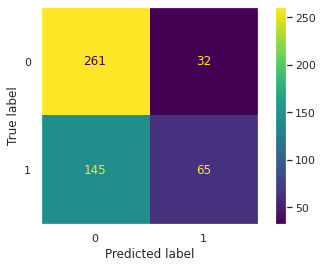

In [12]:
plot_confusion_matrix(optimal_model, X_test, y_test)
plt.show()